# Fundamentals of Computer Science 30398 - Lecture 11

## Basic data visualization
Today we will learn a bit about how we can make our Python code interact with the environment. First of all, when we process large data set, it is often valuable to visualize the results of our algorithm. One of the most commonly used libraries for this, and a very powerful one, is `matplotlib`. Despite its versatility, its also very simple to use for simple tasks.

We start by importing `matplotlib.pyplot` library. We use the additional `as` syntax to give it a shorthand name `plt`; in order to call a function `plot` from this library, I will not have to write `matplotlib.pyplot.plot()`, just `plt.plot()`.

In [29]:
import matplotlib.pyplot as plt
import math

Now, we create a simple list `data` with numbers $x^2$ for $x$ from $0$ to $99$.

In [5]:
data = [x*x for x in range(0, 100)]

We can now draw a line connecting points with coordinates $(i, data[i])$ for $i$ from $0$ to `len(data)-1`, by a simple function call with a single argument:

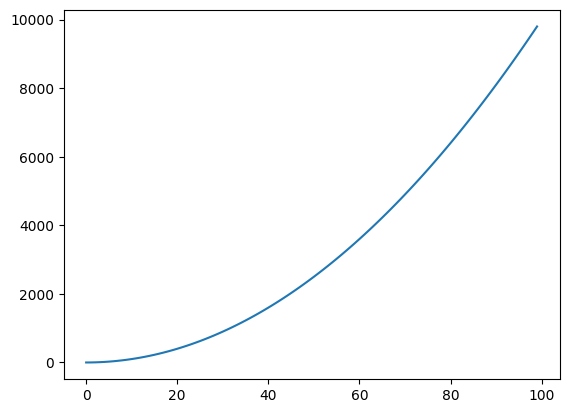

In [7]:
plt.plot(data)

If we want to specifcy explicitly the $x$-positions of the data points as well, we can also do it.

Let's first create a list of numbers between $-10$ and $10$, with a step-size $0.01$, used for $x$ coordinates of points we want to plot:

In [16]:
xx = [ j/100 - 10 for j in range(2001)] 

In [17]:
xx[0], xx[1]

(-10.0, -9.99)

In [18]:
xx[-1]

10.0

Now, let's create another list, `yy`, of the same lenght as `xx`, where the element `yy[i]` is a square of the corresponding element `xx[i]`.

In [19]:
yy = [ x * x for x in xx ]

In [20]:
yy[0]

100.0

We can call a function `plot` with two arguemnts: both lists of the same length, one providing `x` coordiantes of points, the second `y` coordinates of points, to draw a plot with a line connecting those points in order:

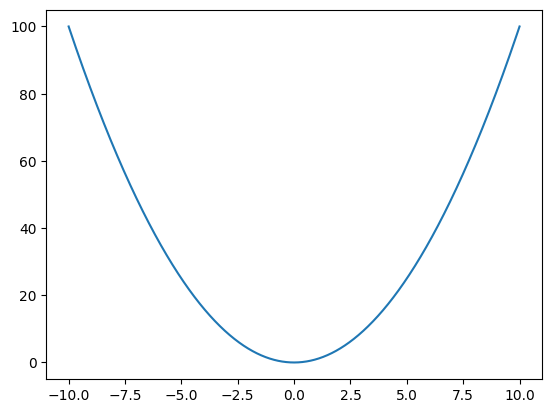

In [21]:
plt.plot(xx, yy)

Let's get back to the class `Polynomial` we defined on a previous lecture. It is used to represent polynomials, and we might want to draw a plot of a polynomial (in a given range of $x$ variable), represented by an object of this class. As a reminder, we will include the class definition from the prebious lecture.

In [23]:
class Polynomial:
    def __init__(self, coefficients):
        self.coeff = coefficients

    def evaluate(self, t):
        result = 0
        for k in range(len(self.coeff)):
            result += self.coeff[k] * (t**k)
        return result

In [22]:
p = Polynomial([1, 0, 2])

In [24]:
p.evaluate(1)

3

**Exercise 1.**
Write a function `prepare_xy` which takes four arguments: `range_start`, `range_end`, `f`, and `n`, where `n` has default value `100`. `range_start` and `range_end` are both of type `float`, and `f` is a function that takes a single argument (of type `float`) and returns a value of type `float`.

The function `prepare_xy` should output two list `xx` and `yy`.  Here `xx` is a list that has exactly `n` numbers, equally spaced, from `range_start` to `range_end`. The list `yy` at position `i`, should have value `f(xx[i])`.

The header of your function should look like this:
```python
def prepare_xy(range_start, range_end, f, n=100):
```
**Note**
The output of the function `prepare_xy` is designed exactly the same as the pair of arguments function `plt.plot` is supposed to take.

**Solution**

In [24]:
def prepare_xy(range_start, range_end, f, n=100):
    gap = (range_end - range_start) / (n-1)
    xx = [ i * gap + range_start for i in range(n)]
    yy = [ f(x) for x in xx ]
    return xx, yy

Now we can call the function `prapare_xy`, providing it as a third argument a Python implementation of a mathematical function, together with the `plt.plot` function, to get a plot of a function of interest in a specific range.

For example, the following code plots function $f(x) = x^2 + 1$ for $x$ from $-1$ to $4$.

In [25]:
xx, yy = prepare_xy(-1, 4, lambda x : x*x + 1)

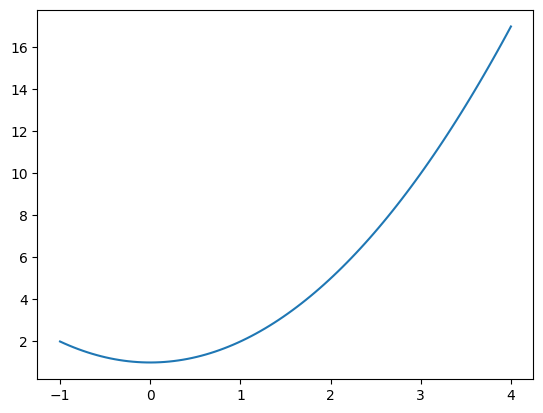

In [26]:
plt.plot(xx, yy)

And the following code plots $\sin(x)$ for $x$ from $-5$ to $5$

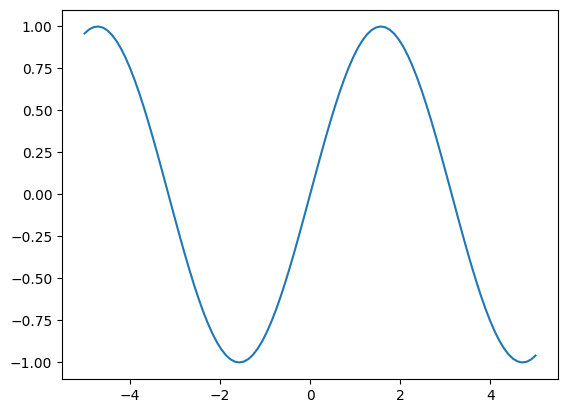

In [31]:
xx, yy = prepare_xy(-5, 5, math.sin)
plt.plot(xx, yy)

We can now use the `prepare_xy` function, together with our class `Polynomial` to prepare and draw a plot of any polynomial in a given range, represented as an object of this class. For example,

In [32]:
p = Polynomial([-1, 0, 2])

Creates a polynomial $p$ which is $2 x^2 - 1$.

**Note** The coefficients passed to the class polynomials are ordered in the opposite order than we typically write them when writing explicitly small-degree polynomials - writing the polynomials as $2x^2 - 1$, I start with the coefficient $2$ correspond to the highest degree term $x^2$.

In the code it is more convenient to keep coefficients of a polynomial ordered from the lowest degree: so that `coeff[0]` correspond to the coefficient in front of $x^0$, `coeff[1]` correspond to the coefficient in front if $x^1$ and so on.

We can now call the `prepare_xy` function, passing it as an `f` argument the method `p.evaluate`, to evaluate polynomial `p` on $n=100$ equally spaced numbers in the range $[-2, 5]$.

In [33]:
xx, yy = prepare_xy(range_start=-2, range_end=5, f=p.evaluate)

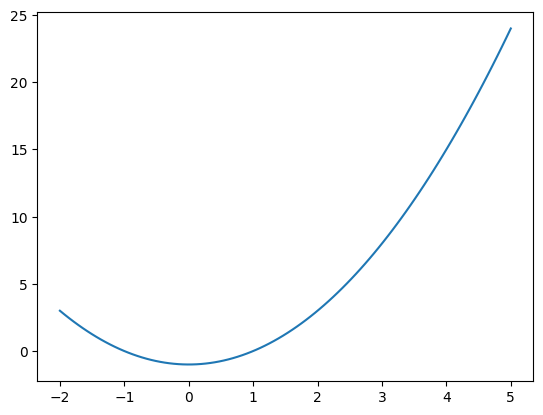

In [34]:
plt.plot(xx, yy)

Let's try the same with a second polynomial $p_2 = x^3 + 1$.

In [35]:
p2 = Polynomial([-1, 0, 0, 1])

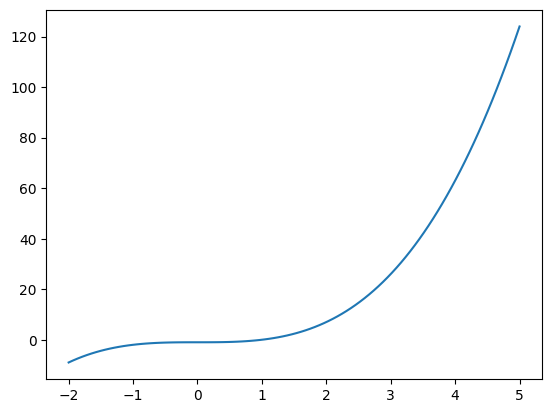

In [37]:
xx, yy = prepare_xy(range_start=-2, range_end=5, f=p2.evaluate)
plt.plot(xx,yy)

# Files

So far we have learned only how to process the data we hand-typed into code. Very often, we will want to write code that is processing large amount of data, collected in some way (from experiment, poll, downloaded from the internet). Surely it does not make sense to try to copy-paste all this data into a code. Instead, within a Python program we would like to open a file and read data from it.

Let's pretend that in the current working directory (usually the same directory our Python) script sits in, we have a file `names`, with random English names, one in each line. We would like to load them as a Python list --- each line of a file, as a seperate list entry.

We need to start by calling a funciton `open`, to open the file `"names"` in the `read` mode, and assign the handle to this file to a variable. For example:

In [40]:
file = open("names", "r") #  open(filename, mode)

The `open` function takes two arguments without default values `filename` is the (path) of a file we want to open, and `mode` --- either `"r"` for `read`, `"w"` for `"write"` or `"a"` for `append`. In this case we are opening the file in the `read` mode. Then we read all of the lines in the file (as a `list` of `str`), and assign them to the `names` variable.

In [41]:
names = file.readlines()

Finally, we are supposed to `close` opened files as soon as we have stopped working on them.

In [42]:
file.close()

That's it! Let's inspect the variable `names`

In [43]:
len(names)

1000

In [44]:
names[3]

'Alaric Joseph\n'

We now have a list of all `1000` lines from the file read into memory, we can write subsequent Python code to process it any way we want. One small issue: the last character of each `name` is `\n` --- we might not have expected it. This is a newline character, representing a line break. Usually we will want to get rid of it. A simple way is to iterate over all elements in the list names, and put in the new list the same element without the last character:

In [45]:
names_stripped = [name[:-1] for name in names]

In [46]:
names_stripped[3]

'Alaric Joseph'

A diffrent, a bit less magical way about it is to use the `strip()` method of `str` class, that returns a new string, after removing all white-spaces from the beginning and the end of the string:

In [47]:
names_stripped = [ name.strip() for name in names]

In [48]:
names_stripped[3]

'Alaric Joseph'

In the end, the entire code looks like this:


In [49]:
file = open("names", "r")
names = file.readlines()
file.close()
names_stripped = [name.strip() for name in names]

## CSV files

Usually, when you interact with data prepared by other people they will have slightly more structure. Very often you will have access to them as a spreadsheet (in MS Excel, LibreOffice Calc or Numbers), or you will them provided directly as `.csv` file. As it turns out the `.csv` files aren't much more complicated than a simple text files we looked at, and if you have a spreadsheet in a more complicated format, all common spreadsheet software packages will let you export it to CSV.

What are CSV files? `CSV` stands for a `Comma Separated Value`. If we look at the dataset like this in a spreadsheet software

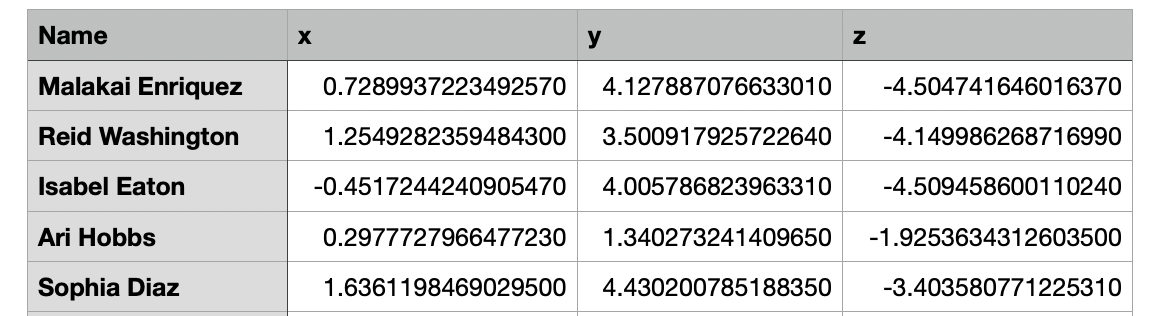

after exporting it to a file `data.csv`, and opening it in any text editor, it is going to look like this:
```csv
Name,x,y,z
Malakai Enriquez,0.7289937223492570,4.127887076633010,-4.504741646016370
Reid Washington,1.2549282359484300,3.500917925722640,-4.149986268716990
Isabel Eaton,-0.4517244240905470,4.005786823963310,-4.509458600110240
Ari Hobbs,0.2977727966477230,1.340273241409650,-1.9253634312603500
```

Each line correspond to a single row of a table, and values in corresponding columns are seperated by commas. We can very easily write a code ourselves that reads a data like this and parses it:

In [114]:
file = open("data.csv", "r") # example file "data.csv" is available on Piazza
data = file.readlines()
file.close()
data_parsed = [x.strip().split(",") for x in data]

The only magical part of this code is the rather concise `data_parsed = [x.strip().split(",") for x in data]`. Let's see what it does step by step, first, a typical element of the list data looks like this:

In [56]:
data[3]

'Isabel Eaton,-0.4517244240905470,4.005786823963310,-4.509458600110240\n'

We call the `strip()` method to get rid of the superfluous whitespaces - this returns a new string, without the `\n` character at the end

In [61]:
a = data[3].strip()
a

'Isabel Eaton,-0.4517244240905470,4.005786823963310,-4.509458600110240'

For this string, we call the `split(",")` method, to produce a list of strings, split by the `","` character:

In [62]:
a.split(",")

['Isabel Eaton',
 '-0.4517244240905470',
 '4.005786823963310',
 '-4.509458600110240']

And we do this operation separately for each element of the `data` list, resulting in the code:

In [63]:
data_parsed = [x.strip().split(",") for x in data]

In [64]:
data_parsed[3]

['Isabel Eaton',
 '-0.4517244240905470',
 '4.005786823963310',
 '-4.509458600110240']

### Using external libraries to read files

CSV files are (by design) extremely simple, and easy to parse ourselves, as seen above. Sometimes you will have to deal with more complicated filetypes. As a rule, whenever possible, you should not waste your time trying to parse those filetypes by hand (sometimes you might be forced to) --- usually somebody already have implemented the necessary library, that will handle it for you, and provide you the data from a file in a simple to use format. This is also the case with the `CSV` files --- even though they are extremely simple, it still makes sense to use the library: the code above is not completely correct, and it might break if there is a "," actually written inside a cell. You would have to check the CSV specification to learn what the programs (both exporting and importing data) are supposed to do in this situation.

A better way to to do this, is to import `csv` library that is designed to do the parsing for you, and use it to parse the data. The  code doing the same as above, with the use of `csv.reader` class will look like this:

In [66]:
import csv
file = open("data.csv", "r")
reader = csv.reader(file)
data = [x for x in reader]
file.close()

In [71]:
data[:3]

[['Name', 'x', 'y', 'z'],
 ['Malakai Enriquez',
  '0.7289937223492570',
  '4.127887076633010',
  '-4.504741646016370'],
 ['Reid Washington',
  '1.2549282359484300',
  '3.500917925722640',
  '-4.149986268716990']]

We might want to get rid of the first row, that correspond to the header:

In [72]:
data = data[1:]

And now the data contains the rows of interest:

In [74]:
len(data)

400

In [73]:
data[:3]

[['Malakai Enriquez',
  '0.7289937223492570',
  '4.127887076633010',
  '-4.504741646016370'],
 ['Reid Washington',
  '1.2549282359484300',
  '3.500917925722640',
  '-4.149986268716990'],
 ['Isabel Eaton',
  '-0.4517244240905470',
  '4.005786823963310',
  '-4.509458600110240']]

### Important

At this point over the lecture we have covered several functions from various libraries: we saw two different ways of calling `plot` function from the `matplotlib.pyplot` library, we saw few methods of `str` class, the `open` function and `close()` method for file handling, and now the `csv.reader()` class from the `csv` library.

You should **not** try to memorize those methods, and what their argument are supposed to signify, by heart. This is not particularly important knowledge. The bottom line of this lecture is that opening files and loading data from them is relatively easy with Python - you can do it with few lines of code. The same goes for plotting data, with the `matplotlib.pyplot` library. If you need to use any such method in real life, you can just google the documentation, a stackoverflow post that shows how to use the relevant methods, or ask ChatGPT. The exact names and orders of arguments isn't important. For some functions that you will use regularly, you will probably after some time naturally learn them (for example the `str.split()` method) - and if you forget, you can always look it up.

Much more important part of learning programming is actually being able to write code implementing more and more complicated algorithms. The exact syntax of some external functions you might want to call - this is something that you can always look up.

### Back to plotting:
We have now loaded $400$ data points from the `CSV` file, each corresponding to some person with a name, and three numerical featues. We might want to draw those as a scatter plot: for each row of an array `data`, we might want to draw a point on coordinates `x` and `y` (given in corresponding columns of the table).

In [75]:
xx = [ float(record[1]) for record in data]
yy = [ float(record[2]) for record in data]

We can do this with a `scatter` function of the `matplotlib` library:

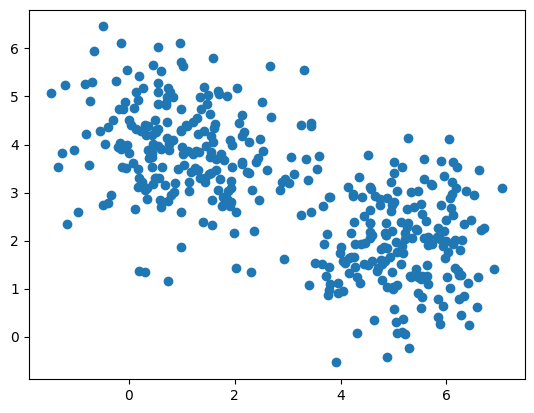

In [76]:
plt.scatter(xx,yy)

By just looking at this visualization we might get more insight into the data than we had from staring at the table: it looks like there are some two sub-populations, for which both $x$ and $y$ features have Gaussian distributions with different means (indeed, this is how this data was generated).

But the data has also the column `z`. How do we want to visualize it? One way around it would be to create a 3 dimensional scatter plot (try doing it with matplotlib), the other: using a color intesnity of each dot to signify the value of variable `z`.

As mentioned above, this is a rare enough use case for the `scatter` function, that you will probably not have seen it before, or not remember how to do it. You can look up the official documentation for the `scatter` function [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html] and after a few minutes with a bit trying you will figure this out. Learning how to read documentation is a useful skill, but very often just asking ChatGPT will provide you a faster answer: and an answer that you can easily verify if it is wrong.

In this case, after a quick question to ChatGPT, for example with the prompt:
```
How to use "scatter" function of the matplotlib library to provide a different color for each datapoint?
```
to learn about the optional argument `c` of the `scatter` function, for which we can provide a list of values (of the same length as `xx` and `yy`), that will be automatically translated into colors.

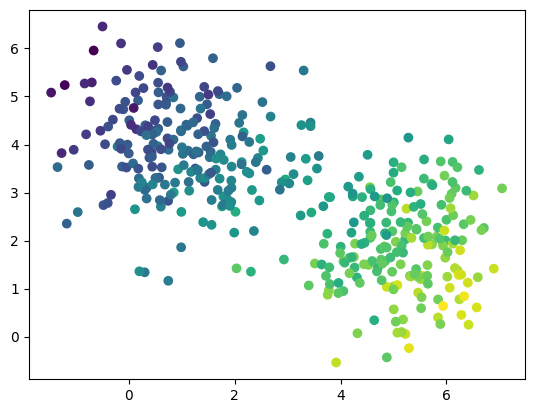

In [78]:
zz = [ float(record[3]) for record in data]
plt.scatter(xx, yy, c = zz)

As a bonus it also suggest using `plt.colorbar()`, so that we can interpret which values were mapped to what colors:

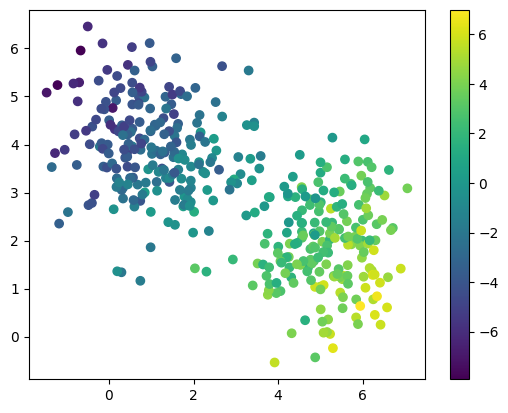

In [79]:
plt.scatter(xx, yy, c = zz)
plt.colorbar()
plt.show()

### A bit more about file interactions:

The code for opening and closing files we learned loook like this:

In [80]:
file = open("data.csv", "r")
... # Do something with the file
file.close()

This, while technically correct, is not the best way of dealing with files in Python, and not the way you will have seen in the code written by other people. The issue with the code above is that we are supposed to `close()` files we have opened. On one hand the structure like above requires us to remember about closing the file, but more importantly: if an error occurs between the call to `open()` function and `close()` method, the `close` will not be execuated, and the file handle will stay open. The standard way for doing it in python is instead:

In [81]:
with open("data.csv", "r") as file:
    reader = csv.reader(file)
    data = [x for x in reader]

This new construction `with` does exactly the same thing as above: calls the function `open` and assigns its value to variable `file`, but after the block of code inside the `with` completes its exectuion, it will actually call the method `close()` automatically --- even if there was an error inside this block.

Again, it is not essential to memorize this syntax, but it is good to be aware that it exists --- if you find yourself having to deal with files in Python, you might google how to use `with` to do this "properly"

## Writing files
If we want to modify the data, and later save it to a CSV file again, so that we can process it with a different program (or open in a spreadsheet), we can do it in a very similar way. Imagine that we want to iterate over all records in the dataset, for each compute $x\cdot y + z$, and add it as an additional column `"w"`, then write the entire updated dataset as a CSV file. First, the calculation might look like this:

In [85]:
for i in range(1, len(data)):
    record = data[i]
    x = float(record[1])
    y = float(record[2])
    z = float(record[3])
    record.append(x*y + z)

Then, to write it to the CSV file we do almost the same thing as for reading. We are opening the file in the write mode now (`"w"`), and use `csv.writer` instead of `csv.reader`. The exact method we need to call, we can easily look up in the documentation or ask ChatGPT

In [83]:
with open("new_data.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerow(["Name", "x", "y", "z","w"]) # We first write the header row
    writer.writerows(data) # Then all the data rows

## Exercise: random walk

For given $N$ produce two arrays: `xx` with all integers from $0$ to $N-1$, and `yy[k]` should correspond to the distance from $0$ after $k$ steps of random walk. That is $yy[k] = yy[k-1] + R_k$ where $R_k$ is at random either $\{-1, 1\}$. Plot `xx, yy` using `plt.plot` function.

**Solution**
We will start by importing the random library:

In [86]:
import random

And write a short function that produces a random number in $\{-1, 1\}$. `random.randint(0,1)` will give us a random number which is either $0$ or $1$, so if we multiply it by two, and substract one, we get what we want:

In [87]:
def random_sign():
    return random.randint(0, 1) * 2 - 1

In [89]:
random_sign()

-1

In [92]:
random_sign()

1

Now we write a function `cumulative_sum` which takes a list `arr`, and provides a list `result` of all prefix sums: 
$$
\mathrm{result}[i] = \sum_{j < i} \mathrm{arr}[j].
$$

In [93]:
def cumulative_sum(arr):
    result = [0]
    for x in arr:
        result.append(x + result[-1])
    return result

Let's check that it works:

In [94]:
cumulative_sum([1,2,3,4,5])

[0, 1, 3, 6, 10, 15]

Finally, `random_walk` function produces $N-1$ random signs, and calls the `cumulative_sum` function on those.

In [95]:
def random_walk(N):
    random_signs = [ random_sign() for i in range(N-1) ]
    yy = cumulative_sum(random_signs)
    xx = [ i for i in range(N)]
    return xx, yy

Let's try several instantiations:

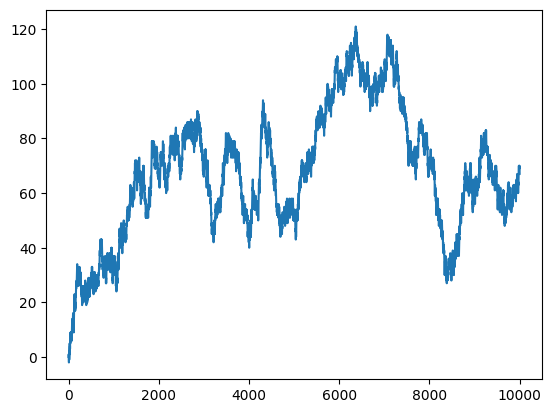

In [103]:
xx, yy = random_walk(10_000)
plt.plot(xx, yy)

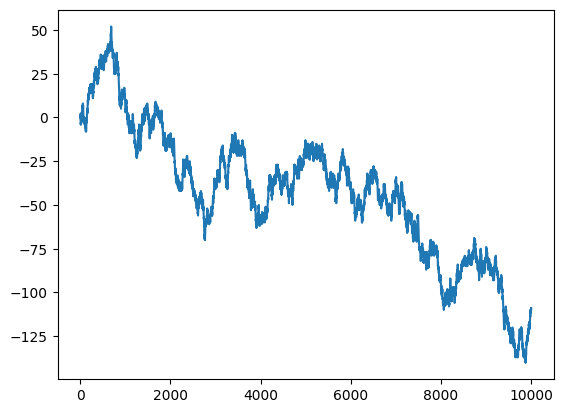

In [107]:
xx, yy = random_walk(10_000)
plt.plot(xx, yy)

Note that even though we are adding around $10 000$ random signs, the final sum is usually closer to $100$, than $10_000$. Indeed, if you experiment more with this data, you will see that for a random walk like that, going for $N$ steps, the final distance from $0$ tends to be around $O(\sqrt{N})$ --- most of left and right steps will cancel each other, and the deviation from $0$ is on the order $O(\sqrt{N})$.

We can also try to plot a few trajectories of a two-dimensional random walk:

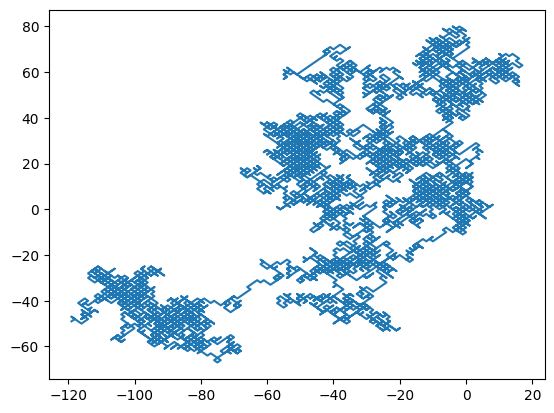

In [111]:
xx, yy = random_walk(10_000)
xx, zz = random_walk(10_000)
plt.plot(yy, zz)

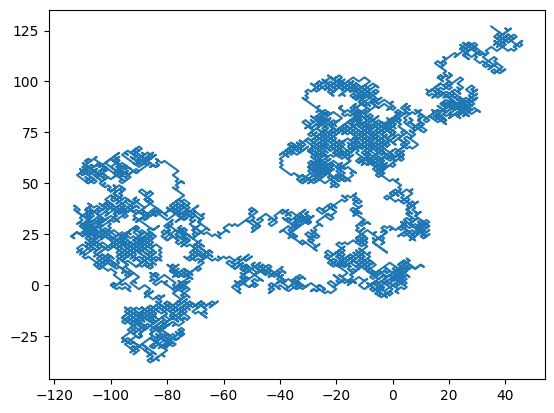

In [112]:
xx, yy = random_walk(10_000)
xx, zz = random_walk(10_000)
plt.plot(yy, zz)

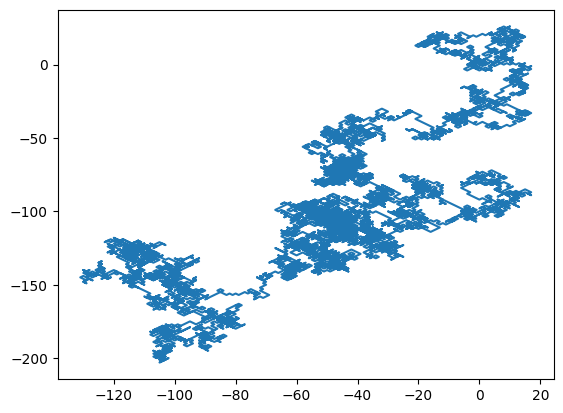

In [113]:
xx, yy = random_walk(10_000)
xx, zz = random_walk(10_000)
plt.plot(yy, zz)